In [1]:
import pandas as pd

In [5]:
df = pd.DataFrame({
    'var1' : [4,3,8],
    'var2' : [2,6,1]
})

In [7]:
df['var_sum'] = df['var1'] + df['var2']
df

var1  var2  var_sum
0     4     2        6
1     3     6        9
2     8     1        9

In [9]:
df['var_mean'] = (df['var1'] + df['var2']) / 2

In [11]:
df

var1  var2  var_sum  var_mean
0     4     2        6       3.0
1     3     6        9       4.5
2     8     1        9       4.5

In [13]:
mpg = pd.read_csv('mpg.csv')

In [15]:
mpg['total'] = (mpg['cty']+mpg['hwy'])/2
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category  \
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact   
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact   
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact   
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact   
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact   

   total  
0   23.5  
1   25.0  
2   25.5  
3   25.5  
4   21.0

In [17]:
sum(mpg['total']) / len(mpg) #합계를 행 수로 나누기

20.14957264957265

In [19]:
mpg['total'].mean()

20.14957264957265

In [21]:
mpg['total'].describe()

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: total, dtype: float64

In [23]:
mpg['total'].plot.hist()

<Axes: ylabel='Frequency'>

In [25]:
#요약 통계량과 히스토그램을 종합해 보았을 때, 연비가 20이 넘는 자동차에 고연비 합격 판정을 내리면 적당할 것!

In [27]:
import numpy as np
#배열 연산, 통계치 계산 등 수치 연산을 할 때 자주 사용

In [29]:
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category  \
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact   
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact   
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact   
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact   
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact   

   total  test  
0   23.5  pass  
1   25.0  pass  
2   25.5  pass  
3   25.5  pass  
4   21.0  pass

In [31]:
mpg['test'].value_counts()

test
pass    128
fail    106
Name: count, dtype: int64

In [35]:
count_test = mpg['test'].value_counts()
#표를 변수에 할당

<Axes: xlabel='test'>

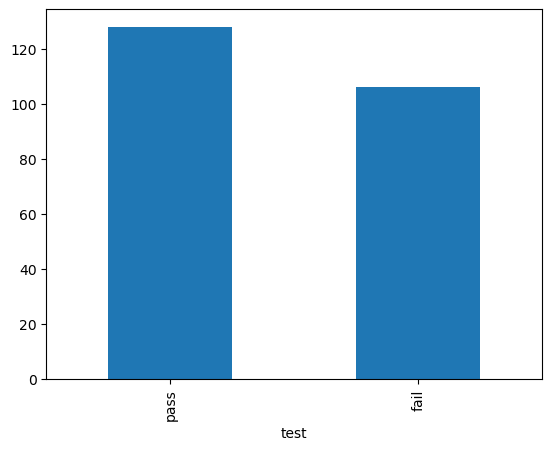

In [37]:
count_test.plot.bar()

In [39]:
count_test.plot.bar(rot=0) #축 이름 수평으로 만들기

<Axes: xlabel='test'>

In [43]:
mpg['grade'] = np.where(mpg['total'] >= 30, 'A',
                       np.where(mpg['total'] >= 20, 'B', 'C'))
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category  \
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact   
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact   
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact   
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact   
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact   

   total  test grade  
0   23.5  pass     B  
1   25.0  pass     B  
2   25.5  pass     B  
3   25.5  pass     B  
4   21.0  pass     B

In [47]:
count_grade = mpg['grade'].value_counts()
count_grade

grade
B    118
C    106
A     10
Name: count, dtype: int64

In [51]:
count_grade.plot.bar(rot = 0) #내림차순 정렬

<Axes: xlabel='grade'>

In [53]:
count_grade = mpg['grade'].value_counts().sort_index()
#알파벳 순으로 정렬된다.
count_grade

grade
A     10
B    118
C    106
Name: count, dtype: int64

<Axes: xlabel='grade'>

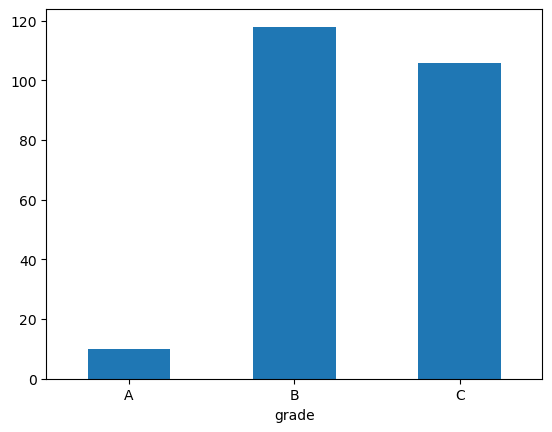

In [55]:
count_grade.plot.bar(rot=0)

In [57]:
mpg['size'] =  np.where((mpg['category'] == 'compact') |
                       (mpg['category'] == 'subcompact') |
                       (mpg['category'] == '2seater'),
                        'small', 'large')
mpg['size'].value_counts()

size
large    147
small     87
Name: count, dtype: int64

In [59]:
mpg['size'] =  np.where(mpg['category'].isin(['compact', 'subcompact', '2seater']), 'small', 'large')
mpg['size'].value_counts()

size
large    147
small     87
Name: count, dtype: int64